In [1]:
import pandas as pd 
import matplotlib.pyplot as plt



In [3]:
def plot_selection(ax, df,error_type):

    means = df[error_type + "_mean"]
    n_patients = df["n_patients"]
    percentile_95 = df[error_type + "_95p"]
    print(percentile_95)
    percentile_5 = df[error_type + "_5p"]
    print(percentile_5)
    error_lower = [mean - p5 for mean, p5 in zip(means, percentile_5)]
    print(error_lower)
    error_upper = [p95 - mean for mean, p95 in zip(means, percentile_95)]
    print(error_upper)
    error = [error_lower, error_upper]  # Matplotlib needs error in this format
    print(error)


    ax.errorbar(n_patients, means, yerr=error, fmt='o', capsize=5)

def df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint):

    df_selected = df
    df_selected = df_selected[df_selected["n_patients"] <= max_patients]
    df_selected = df_selected[df_selected["n_patients"] >= min_patients]
    df_selected = df_selected[df_selected["nknots"] == nknots]
    df_selected = df_selected[df_selected["weight_function"] == weight_function]
    df_selected = df_selected[df_selected["constraint"] == constraint]
    df_selected = df_selected[df_selected["n_bootstraps"] == n_bootstraps]
   
    return df_selected

In [2]:
experiment_name = "experiment : 1000 patients to 10000 patients"

df = pd.read_csv("../Simulation_results/" + experiment_name + "/" + "analyzed_" + experiment_name +".csv")
df.head()



,path,n_patients,weight_function,n_bootstraps,nknots,cutoff,constraint,simulation_time,computation_time,sum_weight_diff_mean,sum_weight_diff_95p,sum_weight_diff_5p,AUC_diff_mean,AUC_diff_95p,AUC_diff_5p
0,Simulation_results/experiment : 1000 patients ...,100,exponential_weight,1000,1,180,Right,0.5652,7.141639,0.686906,1.251118,0.254084,0.386410,0.970232,0.036685
1,Simulation_results/experiment : 1000 patients ...,100,exponential_weight,1000,1,180,NaN,0.5652,8.479703,1.174226,1.949507,0.576560,0.512464,1.275430,0.033150
2,Simulation_results/experiment : 1000 patients ...,100,exponential_weight,1000,2,180,Right,0.5652,6.568385,0.911678,1.528953,0.407585,0.433571,1.069430,0.040614
3,Simulation_results/experiment : 1000 patients ...,100,exponential_weight,1000,2,180,NaN,0.5652,9.296569,1.385726,2.252992,0.718488,0.524162,1.281526,0.041413
4,Simulation_results/experiment : 1000 patients ...,100,exponential_weight,1000,3,180,Right,0.5652,7.949182,1.288357,2.173603,0.574364,0.474571,1.185871,0.043419


[9.6943, 44.2503, 143.1007, 532.8799, 60910.7143]


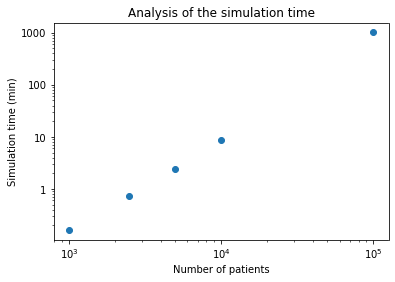

In [3]:
# simulation time
import numpy as np
import matplotlib.ticker as mticker



analyzed_df = df[ df["n_bootstraps"] == 1000]
analyzed_df = analyzed_df[ analyzed_df["n_patients"]>= 1000]
analyzed_df = analyzed_df[ analyzed_df["nknots"] == 1]
analyzed_df = analyzed_df[ analyzed_df["constraint"] == "Right"]
analyzed_df


simulation_time = list(analyzed_df["simulation_time"])
print(simulation_time)
simulation_time_min = [x/60 for x in simulation_time]
n_patients = list(analyzed_df["n_patients"])

def custom_formatter(x, pos):
    return f"{int(x)}"


# plt.rc('axes.formatter', useoffset=False)
plt.scatter(n_patients,simulation_time_min)
plt.xscale('log')
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))
# plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))
plt.xlabel("Number of patients")
plt.ylabel("Simulation time (min)")
plt.title("Analysis of the simulation time")


plt.show()


[12.100879907608032, 21.23461127281189, 34.65624809265137, 69.72241687774658, 1834.291969537735]


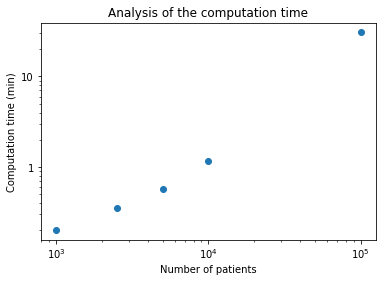

In [4]:
# simulation time
import numpy as np
import matplotlib.ticker as mticker



analyzed_df = df[ df["n_bootstraps"] == 1000]
analyzed_df = analyzed_df[ analyzed_df["n_patients"]>= 1000]
analyzed_df = analyzed_df[ analyzed_df["nknots"] == 1]
analyzed_df = analyzed_df[ analyzed_df["constraint"] == "Right"]
analyzed_df


computation_time = list(analyzed_df["computation_time"])
print(computation_time)
computation_time_min = [x/60 for x in computation_time]
n_patients = list(analyzed_df["n_patients"])

def custom_formatter(x, pos):
    return f"{int(x)}"


# plt.rc('axes.formatter', useoffset=False)
plt.scatter(n_patients,computation_time_min)
plt.xscale('log')
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))
# plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))
plt.xlabel("Number of patients")
plt.ylabel("Computation time (min)")
plt.title("Analysis of the computation time")

plt.show()

[7.141638994216919, 6.122503042221069, 7.439655303955078, 12.100879907608032, 21.23461127281189, 34.65624809265137, 69.72241687774658, 1834.291969537735]


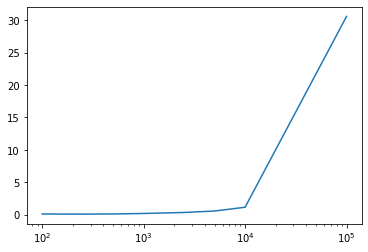

In [5]:
# simulation time
import numpy as np

analyzed_df = df[ df["n_bootstraps"] == 1000]
analyzed_df = analyzed_df[ analyzed_df["nknots"] == 1]
analyzed_df = analyzed_df[ analyzed_df["constraint"] == "Right"]
analyzed_df


computation_time = list(analyzed_df["computation_time"])
print(computation_time)
computation_time_min = [x/60 for x in computation_time]
n_patients = list(analyzed_df["n_patients"])

plt.plot(n_patients,computation_time_min)
plt.xscale('log')
plt.show()

In [6]:
analyzed_df = df[df["nknots"] == 1]

means = analyzed_df["weight_diff_mean"]
n_patients = analyzed_df["n_patients"]
percentile_95 = analyzed_df["weight_diff_95p"]
percentile_5 = analyzed_df["weight_diff_5p"]
error_lower = [mean - p5 for mean, p5 in zip(means, percentile_5)]
error_upper = [p95 - mean for mean, p95 in zip(means, percentile_95)]
error = [error_lower, error_upper]  # Matplotlib needs error in this format



plt.errorbar(n_patients, means, yerr=error, fmt='o', capsize=5)
plt.xlabel('number of patients')
plt.ylabel('Mean Value')
plt.title('Means for 1 knot')
plt.show()

KeyError: 'weight_diff_mean'

In [7]:
analyzed_df = df[df["nknots"] == 3]

means = analyzed_df["air_diff_mean"]
n_patients = analyzed_df["n_patients"]
percentile_95 = analyzed_df["air_diff_95p"]
percentile_5 = analyzed_df["air_diff_5p"]
error_lower = [mean - p5 for mean, p5 in zip(means, percentile_5)]
error_upper = [p95 - mean for mean, p95 in zip(means, percentile_95)]
error = [error_lower, error_upper]  # Matplotlib needs error in this format



plt.errorbar(n_patients, means, yerr=error, fmt='o', capsize=5)
plt.xlabel('Number of patients')
plt.ylabel('Mean Value')
plt.title('Means with 5th and 95th Percentile Error Bars')
plt.show()

KeyError: 'air_diff_mean'

In [8]:
df_1_2 = pd.read_csv("/home/apoirotb/dev/Inria/survivalGPU/simulations/Simulation_results/18-01-2023/analyzed_18-01-2023.csv")
df_1_2

FileNotFoundError: [Errno 2] No such file or directory: '/home/apoirotb/dev/Inria/survivalGPU/simulations/Simulation_results/18-01-2023/analyzed_18-01-2023.csv'

In [9]:
df_1_2[df_1_2["n_patients"] < 1000]

NameError: name 'df_1_2' is not defined

In [101]:
min_patients = 100
max_patients = 5000
nknots = 1
function = "exponential_weight"



In [10]:
means = df["air_diff_mean"]
n_patients = df["n_patients"]
percentile_95 = df["air_diff_95p"]
percentile_5 = df["air_diff_5p"]
error_lower = [mean - p5 for mean, p5 in zip(means, percentile_5)]
error_upper = [p95 - mean for mean, p95 in zip(means, percentile_95)]
error = [error_lower, error_upper]  # Matplotlib needs error in this format



plt.errorbar(n_patients, means, yerr=error, fmt='o', capsize=5)
plt.xlabel('Number of patients')
plt.ylabel('Mean Value')
plt.title('Means with 5th and 95th Percentile Error Bars')
plt.show()

KeyError: 'air_diff_mean'

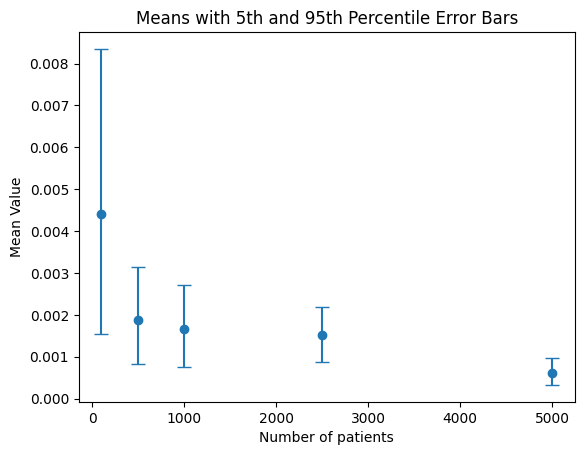

In [96]:
means = df["weight_diff_mean"]
n_patients = df["n_patients"]
percentile_95 = df["weight_diff_95p"]
percentile_5 = df["weight_diff_5p"]
error_lower = [mean - p5 for mean, p5 in zip(means, percentile_5)]
error_upper = [p95 - mean for mean, p95 in zip(means, percentile_95)]
error = [error_lower, error_upper]  # Matplotlib needs error in this format



plt.errorbar(n_patients, means, yerr=error, fmt='o', capsize=5)
plt.xlabel('Number of patients')
plt.ylabel('Mean Value')
plt.title('Means with 5th and 95th Percentile Error Bars')
plt.show()

In [2]:
def print_graph(ax, df,error_type):

    means = df[error_type + "_mean"]
    n_patients = df["n_patients"]
    percentile_95 = df[error_type + "_95p"]
    percentile_5 = df[error_type + "_5p"]
    error_lower = [mean - p5 for mean, p5 in zip(means, percentile_5)]
    error_upper = [p95 - mean for mean, p95 in zip(means, percentile_95)]
    error = [error_lower, error_upper]  # Matplotlib needs error in this format



    ax.errorbar(n_patients, means, yerr=error, fmt='o', capsize=5)
    ax.set_xticks(n_patients)
    ax.set_xlabel('Number of patients')
    ax.set_ylabel(error_type)
    ax.set_title(error_type)
    return ax

def df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint):

    df_selected = df
    df_selected = df_selected[df_selected["n_patients"] <= max_patients]
    df_selected = df_selected[df_selected["n_patients"] >= min_patients]
    df_selected = df_selected[df_selected["nknots"] == nknots]
    df_selected = df_selected[df_selected["weight_function"] == weight_function]
    df_selected = df_selected[df_selected["n_bootstraps"] == n_bootstraps]
    df_selected = df_selected[df_selected["constraint"] == constraint]

   
    return df_selected

In [15]:
min_patients = 20
max_patients = 100
nknots = 1
weight_function = "exponential_weight"

error_type = "weight_diff"

df = pd.read_csv("/home/apoirotb/dev/Inria/survivalGPU/simulations/Simulation_results/18-01-2023/analyzed_18-01-2023.csv")
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function)
print_graph(df_selected, error_type)

FileNotFoundError: [Errno 2] No such file or directory: '/home/apoirotb/dev/Inria/survivalGPU/simulations/Simulation_results/18-01-2023/analyzed_18-01-2023.csv'

In [19]:
min_patients = 100
max_patients = 5000
nknots = 1
weight_function = "exponential_weight"
n_bootstraps = 1000
constraint = "Right"

error_type = "weight_diff"

df = pd.read_csv("/home/apoirotb/dev/Inria/survivalGPU/simulations/Simulation_results/exponential_weight 100 - 100 000/exponential_weight 100 - 100 000.csv")
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function, n_bootstraps=n_bootstraps,constraint=constraint)
print_graph(df_selected, error_type)

TypeError: df_selector() got an unexpected keyword argument 'error_type'

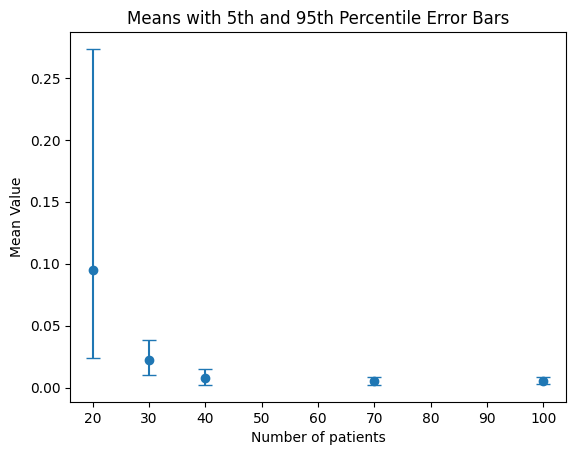

In [113]:
min_patients = 20
max_patients = 100
nknots = 1
weight_function = "bi_linear_weight"

error_type = "weight_diff"

df = pd.read_csv("/home/apoirotb/dev/Inria/survivalGPU/simulations/Simulation_results/18-01-2023/analyzed_18-01-2023.csv")
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function)
print_graph(df_selected, error_type)

In [3]:
def plot_selection(ax, df,error_type):

    means = df[error_type + "_mean"]
    n_patients = df["n_patients"]
    percentile_95 = df[error_type + "_95p"]
    print(percentile_95)
    percentile_5 = df[error_type + "_5p"]
    print(percentile_5)
    error_lower = [mean - p5 for mean, p5 in zip(means, percentile_5)]
    print(error_lower)
    error_upper = [p95 - mean for mean, p95 in zip(means, percentile_95)]
    print(error_upper)
    error = [error_lower, error_upper]  # Matplotlib needs error in this format
    print(error)


    ax.errorbar(n_patients, means, yerr=error, fmt='o', capsize=5)

def df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint):

    df_selected = df
    df_selected = df_selected[df_selected["n_patients"] <= max_patients]
    df_selected = df_selected[df_selected["n_patients"] >= min_patients]
    df_selected = df_selected[df_selected["nknots"] == nknots]
    df_selected = df_selected[df_selected["weight_function"] == weight_function]
    df_selected = df_selected[df_selected["constraint"] == constraint]
    df_selected = df_selected[df_selected["n_bootstraps"] == n_bootstraps]
   
    return df_selected

0     0.970232
12    0.669704
24    0.372098
36    0.258816
48    0.203438
60    0.158931
72    0.071874
84    0.053210
Name: AUC_diff_95p, dtype: float64
0     0.036685
12    0.026529
24    0.012814
36    0.008790
48    0.008858
60    0.005978
72    0.002245
84    0.014244
Name: AUC_diff_5p, dtype: float64
[0.3497252421594178, 0.26686894963867036, 0.1348077689564194, 0.0948970840553701, 0.084908061719092, 0.0683191538952018, 0.0263139971997598, 0.019375601828507297]
[0.58382203831648, 0.3763065151577664, 0.2244762432738893, 0.1551283485427884, 0.10967177365170129, 0.08463358379044181, 0.04331527757441529, 0.019591105625813905]
[[0.3497252421594178, 0.26686894963867036, 0.1348077689564194, 0.0948970840553701, 0.084908061719092, 0.0683191538952018, 0.0263139971997598, 0.019375601828507297], [0.58382203831648, 0.3763065151577664, 0.2244762432738893, 0.1551283485427884, 0.10967177365170129, 0.08463358379044181, 0.04331527757441529, 0.019591105625813905]]
0     0.970232
12    0.669704
24  

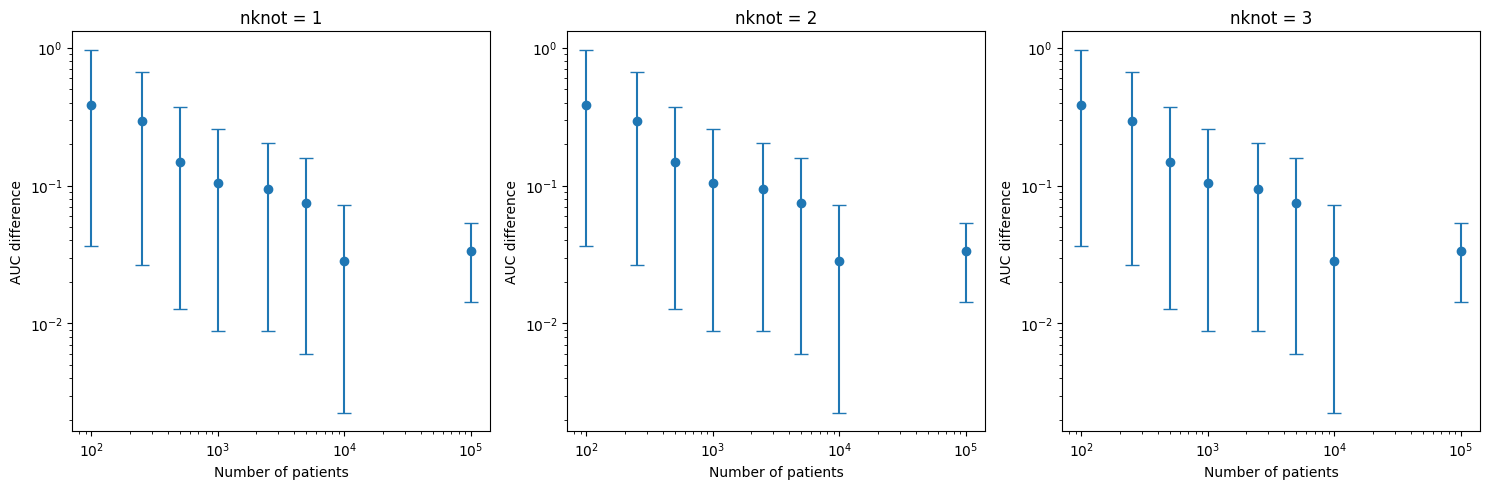

In [22]:
experiment_name = "experiment : 1000 patients to 10000 patients"

df = pd.read_csv("../Simulation_results/" + experiment_name + "/" + "analyzed_" + experiment_name +".csv")

plt.figure(figsize=(15, 5))






# df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)

# print(df_selected)
# ax1 = plt.subplot(2, 2, 1) 
# plot_selection(ax1,df_selected,"sum_weight_diff")
# ax2 = plt.subplot(2, 2, 3) 
# plot_selection(ax2,df_selected,"AUC_diff")


min_patients = 100
n_bootstraps = 1000
nknots = 1
weight_function = "exponential_weight"
constraint = "Right"

max_patients = 100000
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)

ax1 = plt.subplot(1, 3, 1) 
plot_selection(ax1,df_selected,"AUC_diff")
plt.xscale('log')
plt.yscale("log")
plt.ylabel("AUC difference")
plt.xlabel("Number of patients")
plt.title("nknot = 1")

n_bootstraps = 1000
nknots = 2

ax2 = plt.subplot(1, 3, 2) 
plot_selection(ax2,df_selected,"AUC_diff")
plt.xscale('log')
plt.yscale("log")
plt.ylabel("AUC difference")
plt.xlabel("Number of patients")
plt.title("nknot = 2")
plt.tight_layout()

n_bootstraps = 1000
nknots = 2

ax2 = plt.subplot(1, 3, 3) 
plot_selection(ax2,df_selected,"AUC_diff")
plt.xscale('log')
plt.yscale("log")
plt.ylabel("AUC difference")
plt.xlabel("Number of patients")
plt.title("nknot = 3")
plt.tight_layout()

plt.show()



0     0.970232
12    0.669704
24    0.372098
36    0.258816
48    0.203438
60    0.158931
72    0.071874
84    0.053210
Name: AUC_diff_95p, dtype: float64
0     0.036685
12    0.026529
24    0.012814
36    0.008790
48    0.008858
60    0.005978
72    0.002245
84    0.014244
Name: AUC_diff_5p, dtype: float64
[0.3497252421594178, 0.26686894963867036, 0.1348077689564194, 0.0948970840553701, 0.084908061719092, 0.0683191538952018, 0.0263139971997598, 0.019375601828507297]
[0.58382203831648, 0.3763065151577664, 0.2244762432738893, 0.1551283485427884, 0.10967177365170129, 0.08463358379044181, 0.04331527757441529, 0.019591105625813905]
[[0.3497252421594178, 0.26686894963867036, 0.1348077689564194, 0.0948970840553701, 0.084908061719092, 0.0683191538952018, 0.0263139971997598, 0.019375601828507297], [0.58382203831648, 0.3763065151577664, 0.2244762432738893, 0.1551283485427884, 0.10967177365170129, 0.08463358379044181, 0.04331527757441529, 0.019591105625813905]]
0     0.970232
12    0.669704
24  

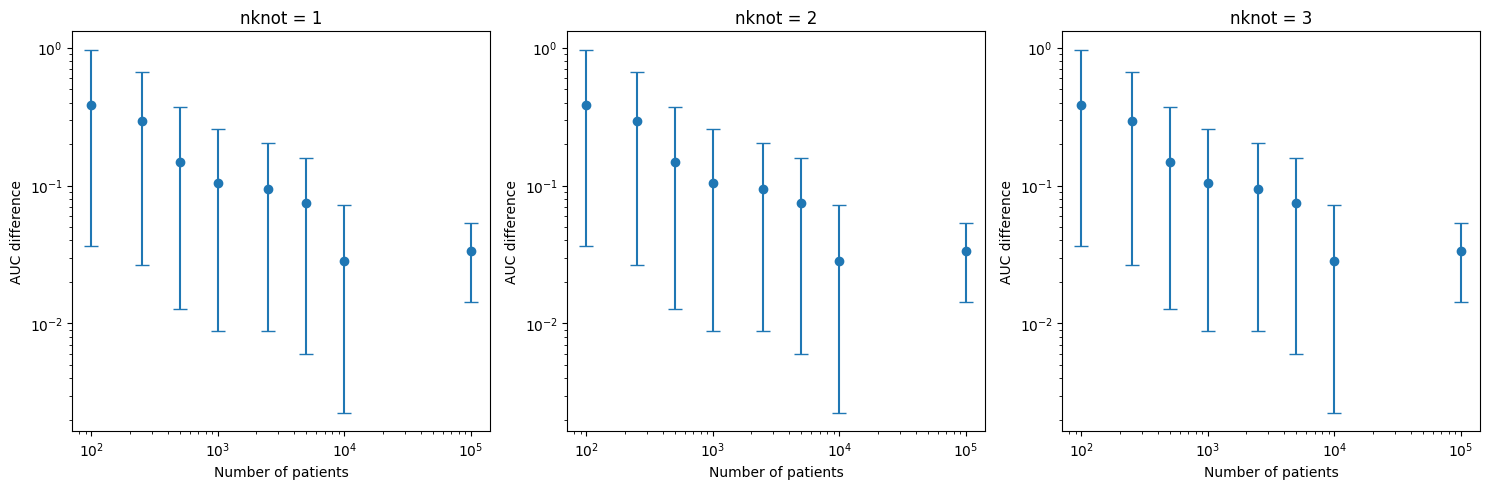

In [21]:
experiment_name = "experiment : 1000 patients to 10000 patients"

df = pd.read_csv("../Simulation_results/" + experiment_name + "/" + "analyzed_" + experiment_name +".csv")
df = df.fillna("None")

plt.figure(figsize=(15, 5))






# df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)

# print(df_selected)
# ax1 = plt.subplot(2, 2, 1) 
# plot_selection(ax1,df_selected,"sum_weight_diff")
# ax2 = plt.subplot(2, 2, 3) 
# plot_selection(ax2,df_selected,"AUC_diff")


min_patients = 100
n_bootstraps = 1000
nknots = 1
weight_function = "exponential_weight"
constraint = "Right"

max_patients = 100000
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)

ax1 = plt.subplot(1, 3, 1) 
# plt.ylim(0, 1.3)
plot_selection(ax1,df_selected,"AUC_diff")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("AUC difference")
plt.xlabel("Number of patients")
plt.title("nknot = 1")

n_bootstraps = 1000
nknots = 2

ax2 = plt.subplot(1, 3, 2) 
# plt.ylim(0, 1.3)
plot_selection(ax2,df_selected,"AUC_diff")
plt.xscale('log')
plt.yscale('log')
plt.ylabel("AUC difference")
plt.xlabel("Number of patients")
plt.title("nknot = 2")
plt.tight_layout()

n_bootstraps = 1000
nknots = 2

ax2 = plt.subplot(1, 3, 3) 
# plt.ylim(0, 1.3)
plot_selection(ax2,df_selected,"AUC_diff")
plt.xscale('log')
plt.yscale('log')

plt.ylabel("AUC difference")
plt.xlabel("Number of patients")
plt.title("nknot = 3")
plt.tight_layout()

plt.show()



In [37]:
experiment_name = "experiment : 1000 patients to 10000 patients"

df = pd.read_csv("../Simulation_results/" + experiment_name + "/" + "analyzed_" + experiment_name +".csv")
df.fillna

,path,n_patients,weight_function,n_bootstraps,nknots,cutoff,constraint,simulation_time,computation_time,sum_weight_diff_mean,sum_weight_diff_95p,sum_weight_diff_5p,AUC_diff_mean,AUC_diff_95p,AUC_diff_5p
0,Simulation_results/experiment : 1000 patients ...,100,exponential_weight,1000,1,180,Right,0.5652,7.141639,0.686906,1.251118,0.254084,0.386410,0.970232,0.036685
1,Simulation_results/experiment : 1000 patients ...,100,exponential_weight,1000,1,180,None,0.5652,8.479703,1.174226,1.949507,0.576560,0.512464,1.275430,0.033150
2,Simulation_results/experiment : 1000 patients ...,100,exponential_weight,1000,2,180,Right,0.5652,6.568385,0.911678,1.528953,0.407585,0.433571,1.069430,0.040614
3,Simulation_results/experiment : 1000 patients ...,100,exponential_weight,1000,2,180,None,0.5652,9.296569,1.385726,2.252992,0.718488,0.524162,1.281526,0.041413
4,Simulation_results/experiment : 1000 patients ...,100,exponential_weight,1000,3,180,Right,0.5652,7.949182,1.288357,2.173603,0.574364,0.474571,1.185871,0.043419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Simulation_results/experiment : 1000 patients ...,10000,exponential_weight,10000,2,180,Right,532.8799,794.180687,0.118864,0.168989,0.076064,0.033504,0.080931,0.002627
81,Simulation_results/experiment : 1000 patients ...,10000,exponential_weight,10000,2,180,None,532.8799,1068.684029,0.135854,0.196267,0.082434,0.041125,0.099952,0.003081
82,Simulation_results/experiment : 1000 patients ...,10000,exponential_weight,10000,3,180,Right,532.8799,927.372286,0.131168,0.184937,0.083062,0.033985,0.082869,0.002686
83,Simulation_results/experiment : 1000 patients ...,10000,exponential_weight,10000,3,180,None,532.8799,1207.850289,0.153551,0.215491,0.096543,0.041510,0.100292,0.003267


                                                 path  n_patients  \
1   Simulation_results/multiple weights, 100-10000...         100   
7   Simulation_results/multiple weights, 100-10000...         500   
13  Simulation_results/multiple weights, 100-10000...        1000   
19  Simulation_results/multiple weights, 100-10000...        5000   
25  Simulation_results/multiple weights, 100-10000...       10000   
31  Simulation_results/multiple weights, 100-10000...       50000   
37  Simulation_results/multiple weights, 100-10000...      100000   

       weight_function  n_bootstraps  nknots  cutoff constraint  \
1   exponential_weight          1000       1     180       None   
7   exponential_weight          1000       1     180       None   
13  exponential_weight          1000       1     180       None   
19  exponential_weight          1000       1     180       None   
25  exponential_weight          1000       1     180       None   
31  exponential_weight          1000       1 

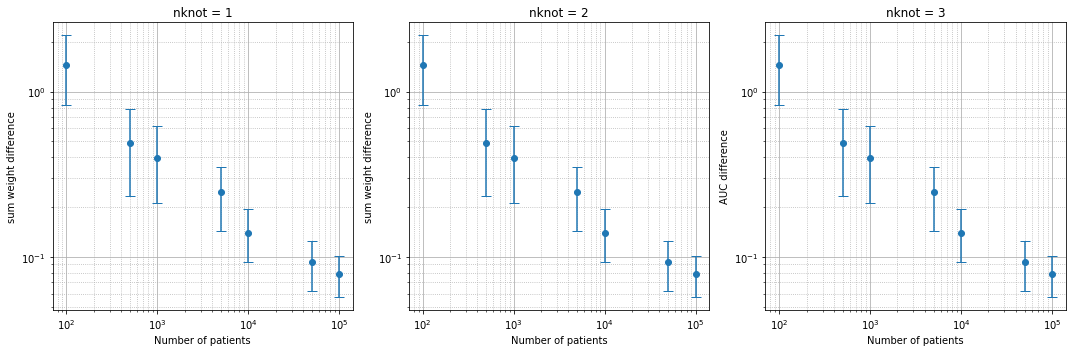

In [35]:
experiment_name = "multiple weights, 100-100000"

df = pd.read_csv("../Simulation_results/" + experiment_name + "/" + "analyzed_" + experiment_name +".csv")
df = df.fillna("None")

plt.figure(figsize=(15, 5))

# print(df.keys())

# print(df)



# df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)

# print(df_selected)
# ax1 = plt.subplot(2, 2, 1) 
# plot_selection(ax1,df_selected,"sum_weight_diff")
# ax2 = plt.subplot(2, 2, 3) 
# plot_selection(ax2,df_selected,"AUC_diff")


min_patients = 100
analytics = "sum_weight_diff"

max_patients = 100000
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)
print(df_selected)


ax1 = plt.subplot(1, 3, 1) 
# plt.ylim(0, 1.3)
plot_selection(ax1,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("sum weight difference")
plt.xlabel("Number of patients")
plt.title("nknot = 1")
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")

n_bootstraps = 1000
nknots = 1

ax2 = plt.subplot(1, 3, 2) 
# plt.ylim(0, 1.3)

plot_selection(ax2,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("sum weight difference")
plt.xlabel("Number of patients")
plt.title("nknot = 2")
plt.tight_layout()
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")


n_bootstraps = 10000
nknots = 2

ax2 = plt.subplot(1, 3, 3) 
# plt.ylim(0, 1.3)

plot_selection(ax2,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("AUC difference")
plt.xlabel("Number of patients")
plt.title("nknot = 3")
plt.tight_layout()
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")

plt.show()

0     0.839537
6     0.307871
12    0.261896
18    0.109065
24    0.074696
30    0.092654
36    0.037894
Name: AUC_diff_95p, dtype: float64
0     0.031485
6     0.010936
12    0.010398
18    0.004618
24    0.002699
30    0.035286
36    0.002691
Name: AUC_diff_5p, dtype: float64
[0.3145565585145824, 0.1206039105498109, 0.0949520769036592, 0.0413945437470532, 0.0280318934239637, 0.029384900931907904, 0.0171685327187577]
[0.4934954325733337, 0.17633096986052207, 0.15654589515718448, 0.0630523787344869, 0.043965215350566994, 0.027982244276133994, 0.018034041574302998]
[[0.3145565585145824, 0.1206039105498109, 0.0949520769036592, 0.0413945437470532, 0.0280318934239637, 0.029384900931907904, 0.0171685327187577], [0.4934954325733337, 0.17633096986052207, 0.15654589515718448, 0.0630523787344869, 0.043965215350566994, 0.027982244276133994, 0.018034041574302998]]
2     0.936791
8     0.357027
14    0.314534
20    0.115917
26    0.090408
32    0.095725
38    0.026501
Name: AUC_diff_95p, dtype: fl

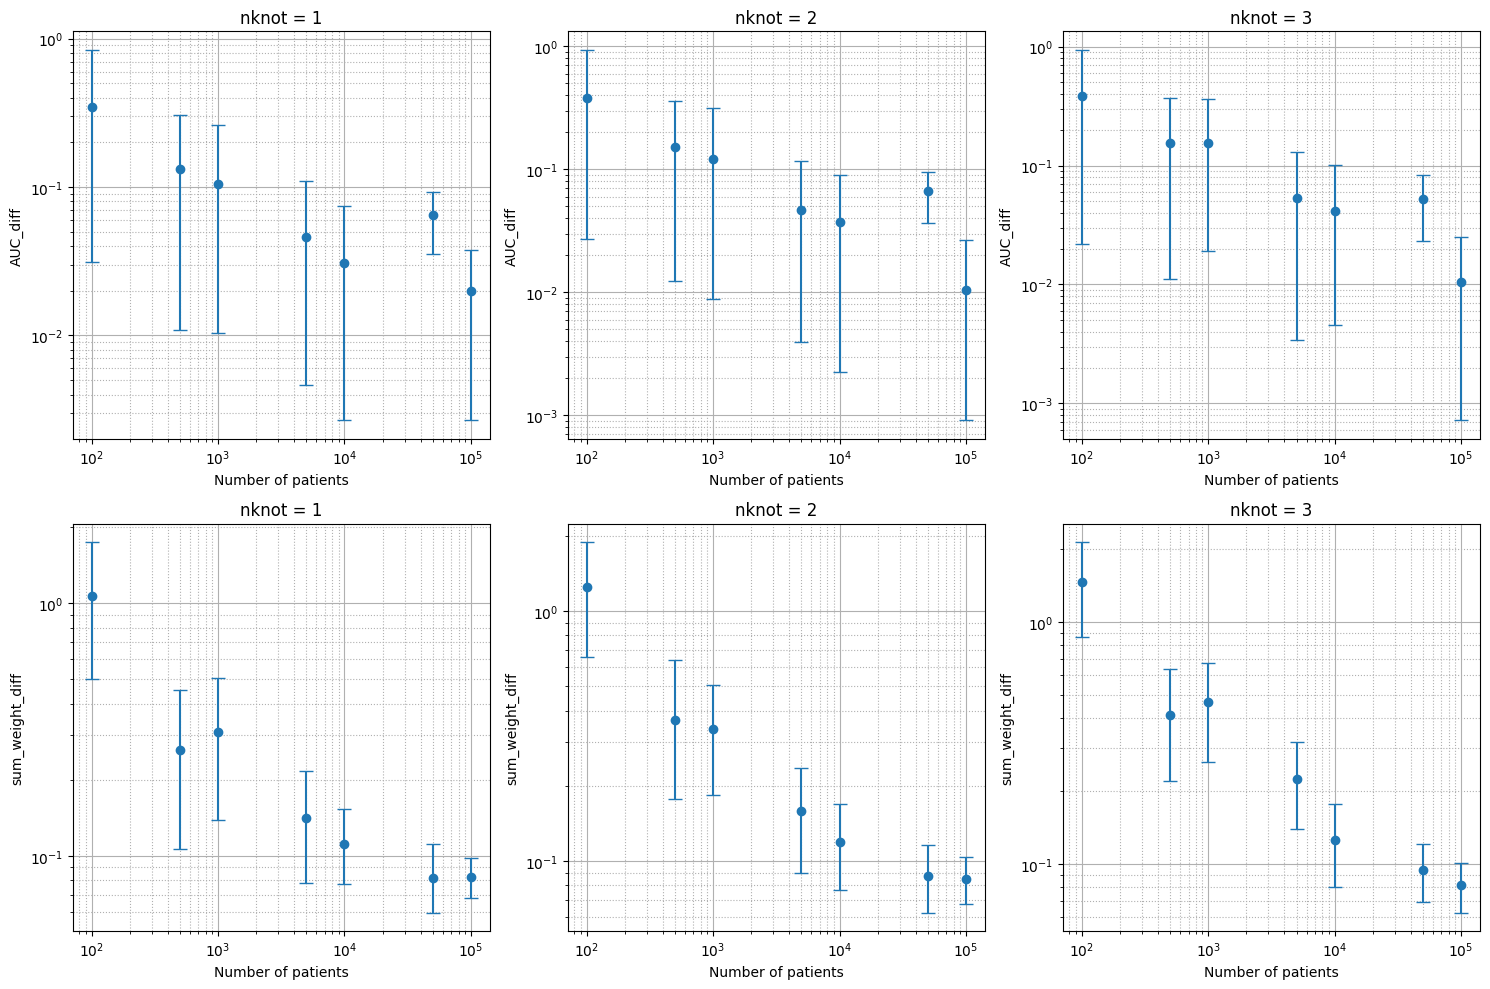

In [59]:
experiment_name = "exponential_weight 100 - 100 000"

df = pd.read_csv("../Simulation_results/" + experiment_name + "/" + "analyzed_" + experiment_name +".csv")
df = df.fillna("None")



# print(df.keys())

# print(df)



# df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)

# print(df_selected)
# ax1 = plt.subplot(2, 2, 1) 
# plot_selection(ax1,df_selected,"sum_weight_diff")
# ax2 = plt.subplot(2, 2, 3) 
# plot_selection(ax2,df_selected,"AUC_diff")


min_patients = 100
max_patients = 100000
n_bootstraps = 1000
nknots = 1
weight_function = "exponential_weight"
constraint = "Right"

# analytics = "sum_weight_diff"

max_patients = 100000
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)

# fig, axs = plt.subplots(2, 3, figsize=(15, 10))

plt.figure(figsize=(15, 10))

analytics = "AUC_diff"


ax= plt.subplot(2, 3, 1) 
# plt.ylim(0, 1.3)
plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("nknot = 1")
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")

nknots = 2
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 3, 2) 
# plt.ylim(0, 1.3)

plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("nknot = 2")
plt.tight_layout()
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")


nknots = 3
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 3, 3) 
# plt.ylim(0, 1.3)

plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("nknot = 3")
plt.tight_layout()
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")

analytics = "sum_weight_diff"



nknots = 1
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 3, 4) 
# plt.ylim(0, 1.3)
plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("nknot = 1")
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")

nknots = 2
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 3, 5) 
# plt.ylim(0, 1.3)

plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("nknot = 2")
plt.tight_layout()

plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")


nknots = 3
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 3, 6) 
# plt.ylim(0, 1.3)

plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("nknot = 3")
plt.tight_layout()
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")



path = '/home/apoirotb/dev/Inria/Notes/Slides /Meeting 27-02-2024/images/'
file_name = "exponential_weight_right_constrined"
plt.savefig(path + file_name, transparent = True)

plt.show()

0     0.839537
6     0.307871
12    0.261896
18    0.109065
24    0.074696
30    0.092654
36    0.037894
Name: AUC_diff_95p, dtype: float64
0     0.031485
6     0.010936
12    0.010398
18    0.004618
24    0.002699
30    0.035286
36    0.002691
Name: AUC_diff_5p, dtype: float64
[0.3145565585145824, 0.1206039105498109, 0.0949520769036592, 0.0413945437470532, 0.0280318934239637, 0.029384900931907904, 0.0171685327187577]
[0.4934954325733337, 0.17633096986052207, 0.15654589515718448, 0.0630523787344869, 0.043965215350566994, 0.027982244276133994, 0.018034041574302998]
[[0.3145565585145824, 0.1206039105498109, 0.0949520769036592, 0.0413945437470532, 0.0280318934239637, 0.029384900931907904, 0.0171685327187577], [0.4934954325733337, 0.17633096986052207, 0.15654589515718448, 0.0630523787344869, 0.043965215350566994, 0.027982244276133994, 0.018034041574302998]]
2     0.936791
8     0.357027
14    0.314534
20    0.115917
26    0.090408
32    0.095725
38    0.026501
Name: AUC_diff_95p, dtype: fl

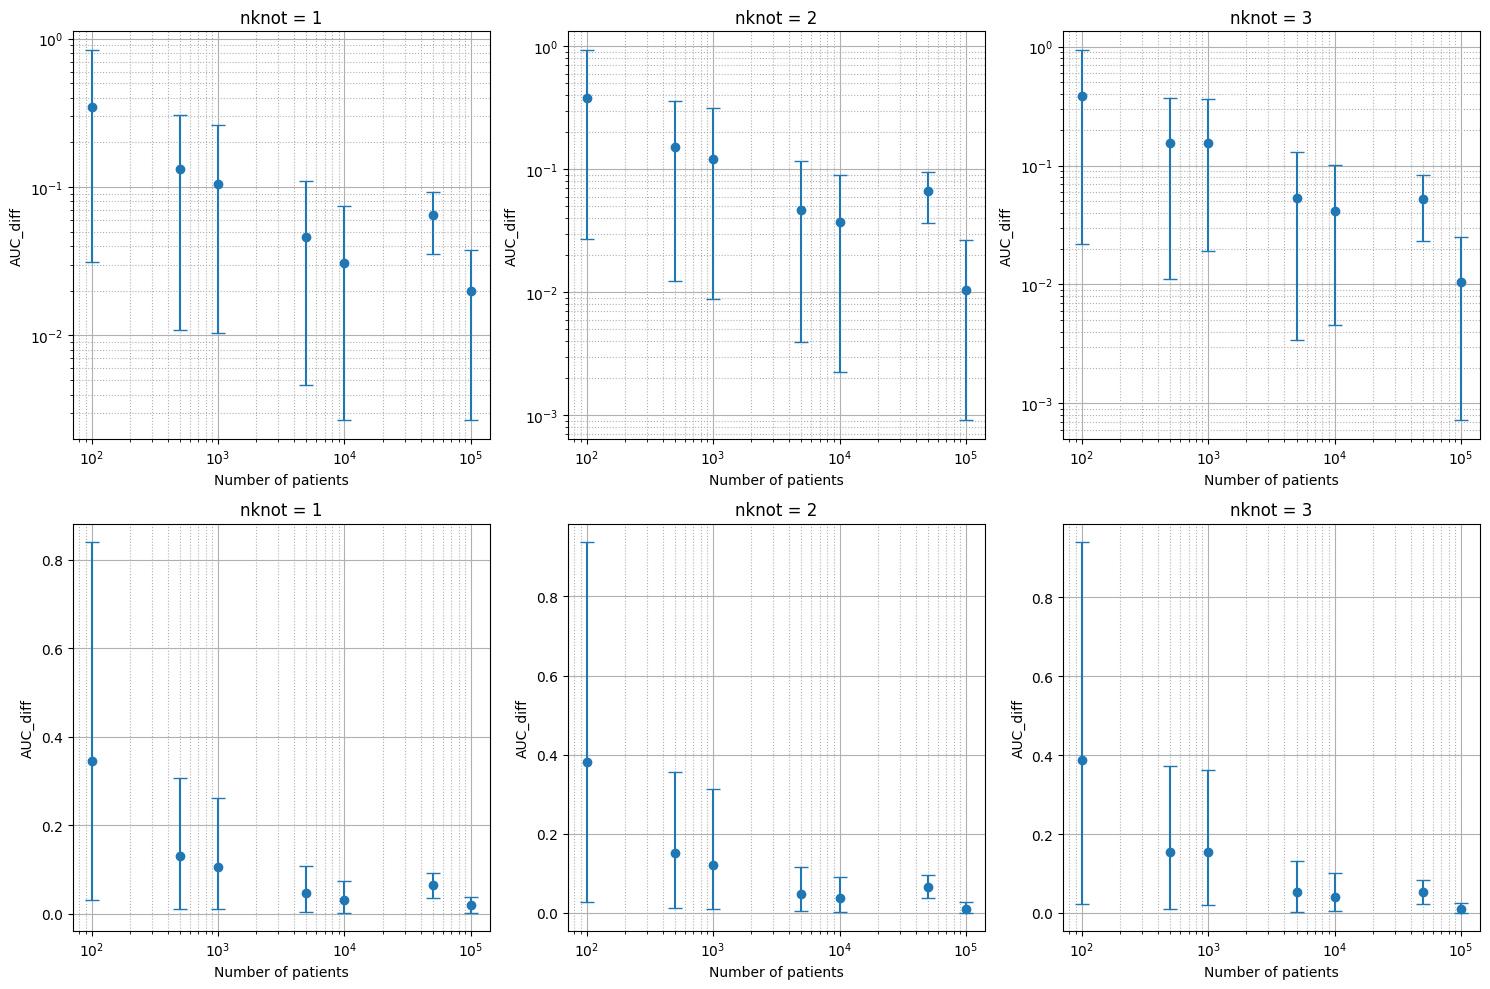

In [61]:
experiment_name = "exponential_weight 100 - 100 000"

df = pd.read_csv("../Simulation_results/" + experiment_name + "/" + "analyzed_" + experiment_name +".csv")
df = df.fillna("None")



# print(df.keys())

# print(df)



# df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)

# print(df_selected)
# ax1 = plt.subplot(2, 2, 1) 
# plot_selection(ax1,df_selected,"sum_weight_diff")
# ax2 = plt.subplot(2, 2, 3) 
# plot_selection(ax2,df_selected,"AUC_diff")


min_patients = 100
max_patients = 100000
n_bootstraps = 1000
nknots = 1
weight_function = "exponential_weight"
constraint = "Right"

# analytics = "sum_weight_diff"

max_patients = 100000
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)

# fig, axs = plt.subplots(2, 3, figsize=(15, 10))

plt.figure(figsize=(15, 10))

analytics = "AUC_diff"


ax= plt.subplot(2, 3, 1) 
# plt.ylim(0, 1.3)
plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("nknot = 1")
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")

nknots = 2
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 3, 2) 
# plt.ylim(0, 1.3)

plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("nknot = 2")
plt.tight_layout()
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")


nknots = 3
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 3, 3) 
# plt.ylim(0, 1.3)

plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("nknot = 3")
plt.tight_layout()
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")

# analytics = "AUC_diff"



nknots = 1
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 3, 4) 
# plt.ylim(0, 1.3)
plot_selection(ax,df_selected,analytics)
plt.xscale('log')
# plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("nknot = 1")
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")

nknots = 2
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 3, 5) 
# plt.ylim(0, 1.3)

plot_selection(ax,df_selected,analytics)
plt.xscale('log')
# plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("nknot = 2")
plt.tight_layout()

plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")


nknots = 3
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 3, 6) 
# plt.ylim(0, 1.3)

plot_selection(ax,df_selected,analytics)
plt.xscale('log')
# plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("nknot = 3")
plt.tight_layout()
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")



path = '/home/apoirotb/dev/Inria/Notes/Slides /Meeting 27-02-2024/images/'
file_name = "logy_non_logy_comparison_AUC"
plt.savefig(path + file_name, transparent = True)

plt.show()

0     1.744794
6     0.454740
12    0.504438
18    0.217726
24    0.153044
30    0.111355
36    0.098362
Name: sum_weight_diff_95p, dtype: float64
0     0.503414
6     0.106218
12    0.139160
18    0.078125
24    0.077703
30    0.059599
36    0.067896
Name: sum_weight_diff_5p, dtype: float64
[0.566357548266649, 0.1566544163636863, 0.1706847608312964, 0.06349201664328578, 0.03322092292457819, 0.021958751648664405, 0.014370532277971512]
[0.6750231373012068, 0.1918674163855611, 0.19459352863579998, 0.076109463199973, 0.04211954960972071, 0.0297977799102664, 0.016095148827880698]
[[0.566357548266649, 0.1566544163636863, 0.1706847608312964, 0.06349201664328578, 0.03322092292457819, 0.021958751648664405, 0.014370532277971512], [0.6750231373012068, 0.1918674163855611, 0.19459352863579998, 0.076109463199973, 0.04211954960972071, 0.0297977799102664, 0.016095148827880698]]
2     1.886732
8     0.637057
14    0.505319
20    0.235791
26    0.169295
32    0.115708
38    0.103552
Name: sum_weight_di

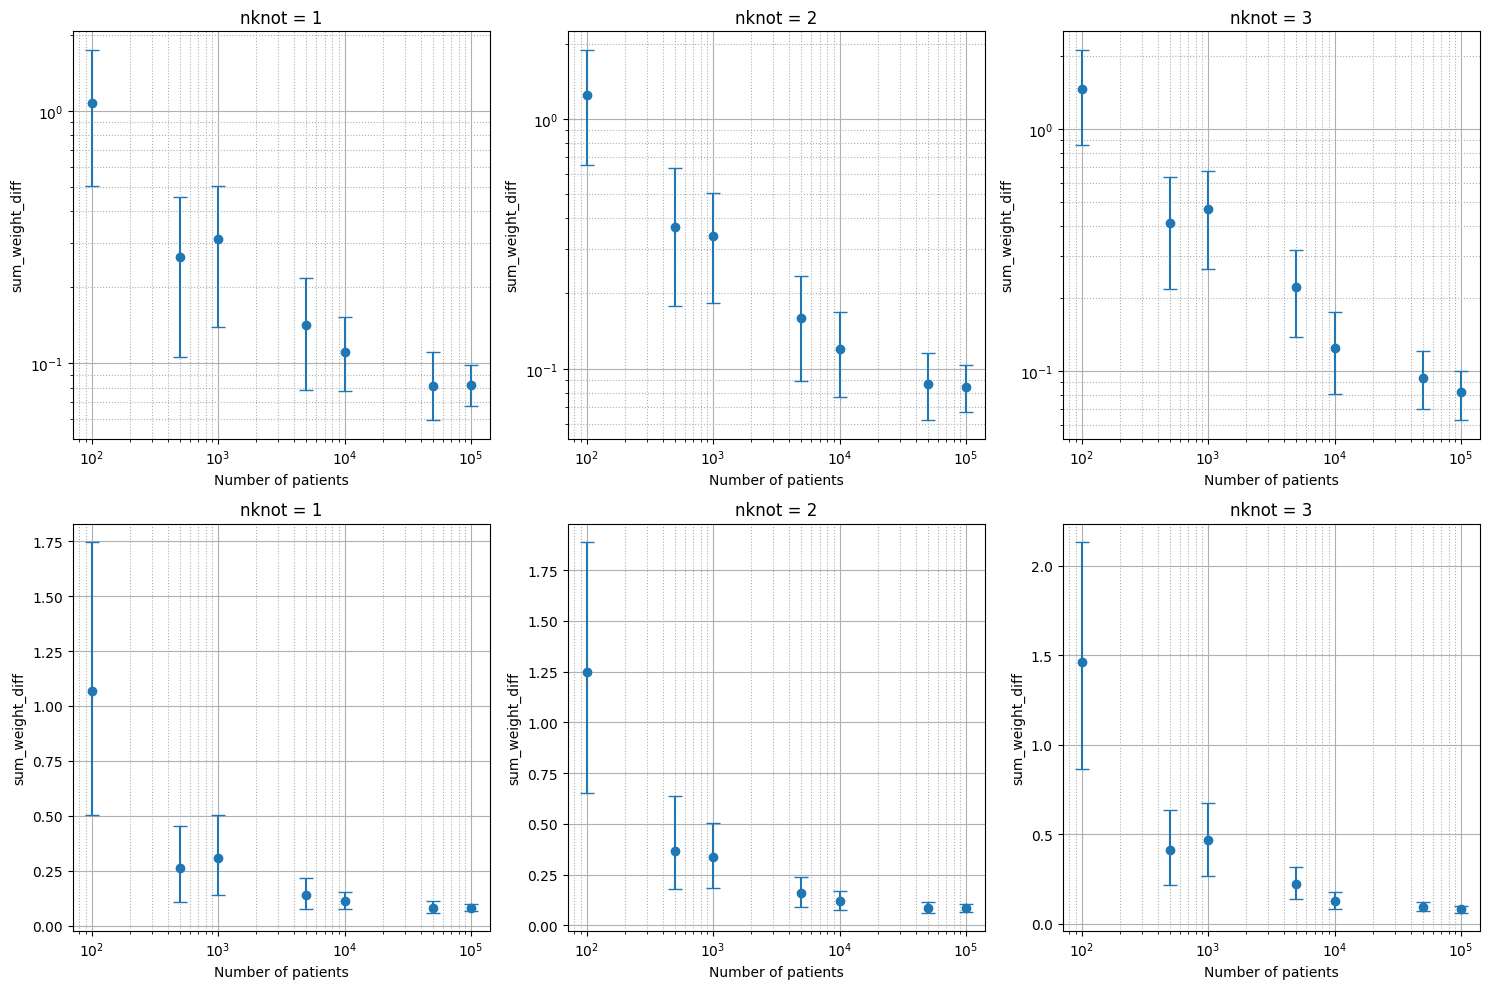

In [78]:
experiment_name = "exponential_weight 100 - 100 000"

df = pd.read_csv("../Simulation_results/" + experiment_name + "/" + "analyzed_" + experiment_name +".csv")
df = df.fillna("None")



# print(df.keys())

# print(df)



# df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)

# print(df_selected)
# ax1 = plt.subplot(2, 2, 1) 
# plot_selection(ax1,df_selected,"sum_weight_diff")
# ax2 = plt.subplot(2, 2, 3) 
# plot_selection(ax2,df_selected,"AUC_diff")


min_patients = 100
max_patients = 100000
n_bootstraps = 1000
nknots = 1
weight_function = "exponential_weight"
constraint = "Right"

# analytics = "sum_weight_diff"

max_patients = 100000
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)

# fig, axs = plt.subplots(2, 3, figsize=(15, 10))

plt.figure(figsize=(15, 10))

analytics = "sum_weight_diff"


ax= plt.subplot(2, 3, 1) 
# plt.ylim(0, 1.3)
plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("nknot = 1")
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")

nknots = 2
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 3, 2) 
# plt.ylim(0, 1.3)

plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("nknot = 2")
plt.tight_layout()
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")


nknots = 3
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 3, 3) 
# plt.ylim(0, 1.3)

plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("nknot = 3")
plt.tight_layout()
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")

analytics = "sum_weight_diff"



nknots = 1
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 3, 4) 
# plt.ylim(0, 1.3)
plot_selection(ax,df_selected,analytics)
plt.xscale('log')
# plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("nknot = 1")
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")

nknots = 2
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 3, 5) 
# plt.ylim(0, 1.3)

plot_selection(ax,df_selected,analytics)
plt.xscale('log')
# plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("nknot = 2")
plt.tight_layout()

plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")


nknots = 3
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 3, 6) 
# plt.ylim(0, 1.3)

plot_selection(ax,df_selected,analytics)
plt.xscale('log')
# plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("nknot = 3")
plt.tight_layout()
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")



path = '/home/apoirotb/dev/Inria/Notes/Slides /Meeting 27-02-2024/images/'
file_name = "logy_non_logy_comparison_sum"
plt.savefig(path + file_name, transparent = True)

plt.show()

0     0.839537
6     0.307871
12    0.261896
18    0.109065
24    0.074696
30    0.092654
36    0.037894
Name: AUC_diff_95p, dtype: float64
0     0.031485
6     0.010936
12    0.010398
18    0.004618
24    0.002699
30    0.035286
36    0.002691
Name: AUC_diff_5p, dtype: float64
[0.3145565585145824, 0.1206039105498109, 0.0949520769036592, 0.0413945437470532, 0.0280318934239637, 0.029384900931907904, 0.0171685327187577]
[0.4934954325733337, 0.17633096986052207, 0.15654589515718448, 0.0630523787344869, 0.043965215350566994, 0.027982244276133994, 0.018034041574302998]
[[0.3145565585145824, 0.1206039105498109, 0.0949520769036592, 0.0413945437470532, 0.0280318934239637, 0.029384900931907904, 0.0171685327187577], [0.4934954325733337, 0.17633096986052207, 0.15654589515718448, 0.0630523787344869, 0.043965215350566994, 0.027982244276133994, 0.018034041574302998]]
1     0.997761
7     0.390330
13    0.351792
19    0.143116
25    0.136720
31    0.073192
37    0.035516
Name: AUC_diff_95p, dtype: fl

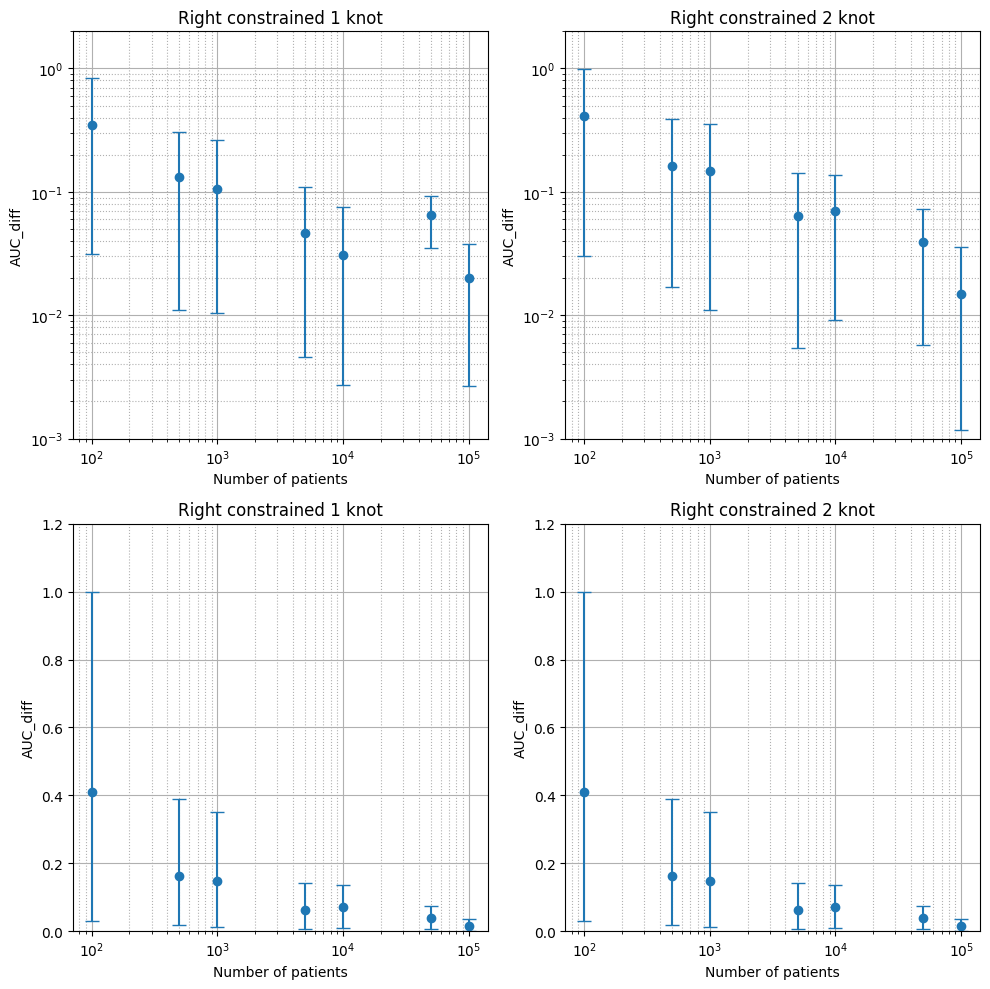

In [10]:
experiment_name = "exponential_weight 100 - 100 000"

df = pd.read_csv("../Simulation_results/" + experiment_name + "/" + "analyzed_" + experiment_name +".csv")
df = df.fillna("None")



# print(df.keys())

# print(df)



# df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)

# print(df_selected)
# ax1 = plt.subplot(2, 2, 1) 
# plot_selection(ax1,df_selected,"sum_weight_diff")
# ax2 = plt.subplot(2, 2, 3) 
# plot_selection(ax2,df_selected,"AUC_diff")


min_patients = 100
max_patients = 100000
n_bootstraps = 1000
nknots = 1
weight_function = "exponential_weight"

# analytics = "sum_weight_diff"

max_patients = 100000
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)

# fig, axs = plt.subplots(2, 3, figsize=(15, 10))

plt.figure(figsize=(10, 10))

analytics = "AUC_diff"
constraint = "Right"


ax= plt.subplot(2, 2, 1) 
# plt.ylim(0, 1.3)
plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("Right constrained 1 knot")
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")
plt.ylim((0.001,2))


nknots = 1
analytics = "AUC_diff"
constraint = "None"

df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 2, 2) 
# plt.ylim(0, 1.3)

plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("Right constrained 2 knot")
plt.tight_layout()
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")
plt.ylim((0.001,2))

constraint = "Right"

ax= plt.subplot(2, 2, 3) 
# plt.ylim(0, 1.3)
plot_selection(ax,df_selected,analytics)
plt.xscale('log')
# plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("Right constrained 1 knot")
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")
plt.ylim((0,1.2))

nknots = 1
constraint = "None"

df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 2, 4) 
# plt.ylim(0, 1.3)

plot_selection(ax,df_selected,analytics)
plt.xscale('log')
# plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("Right constrained 2 knot")
plt.tight_layout()
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")
plt.ylim((0,1.2))




path = '/home/apoirotb/dev/Inria/Notes/Slides /Meeting 27-02-2024/images/'
file_name = "Righ_None_constrained"
plt.savefig(path + file_name, transparent = True)

plt.show()

90    1.744794
91    0.504438
92    0.153044
Name: sum_weight_diff_95p, dtype: float64
90    0.503414
91    0.139160
92    0.077703
Name: sum_weight_diff_5p, dtype: float64
[0.566357548266649, 0.1706847608312964, 0.03322092292457819]
[0.6750231373012068, 0.19459352863579998, 0.04211954960972071]
[[0.566357548266649, 0.1706847608312964, 0.03322092292457819], [0.6750231373012068, 0.19459352863579998, 0.04211954960972071]]
0     2.694850
30    1.232425
60    1.271504
Name: sum_weight_diff_95p, dtype: float64
0     1.353254
30    0.906064
60    1.136579
Name: sum_weight_diff_5p, dtype: float64
[0.6519647965431214, 0.1485814106464387, 0.06553761696815474]
[0.6896316280364987, 0.17777966737747186, 0.06938757562637332]
[[0.6519647965431214, 0.1485814106464387, 0.06553761696815474], [0.6896316280364987, 0.17777966737747186, 0.06938757562637332]]
6     1.914210
12    1.914210
36    1.271472
42    1.271472
66    1.175500
72    1.175500
Name: sum_weight_diff_95p, dtype: float64
6     0.738315
12 

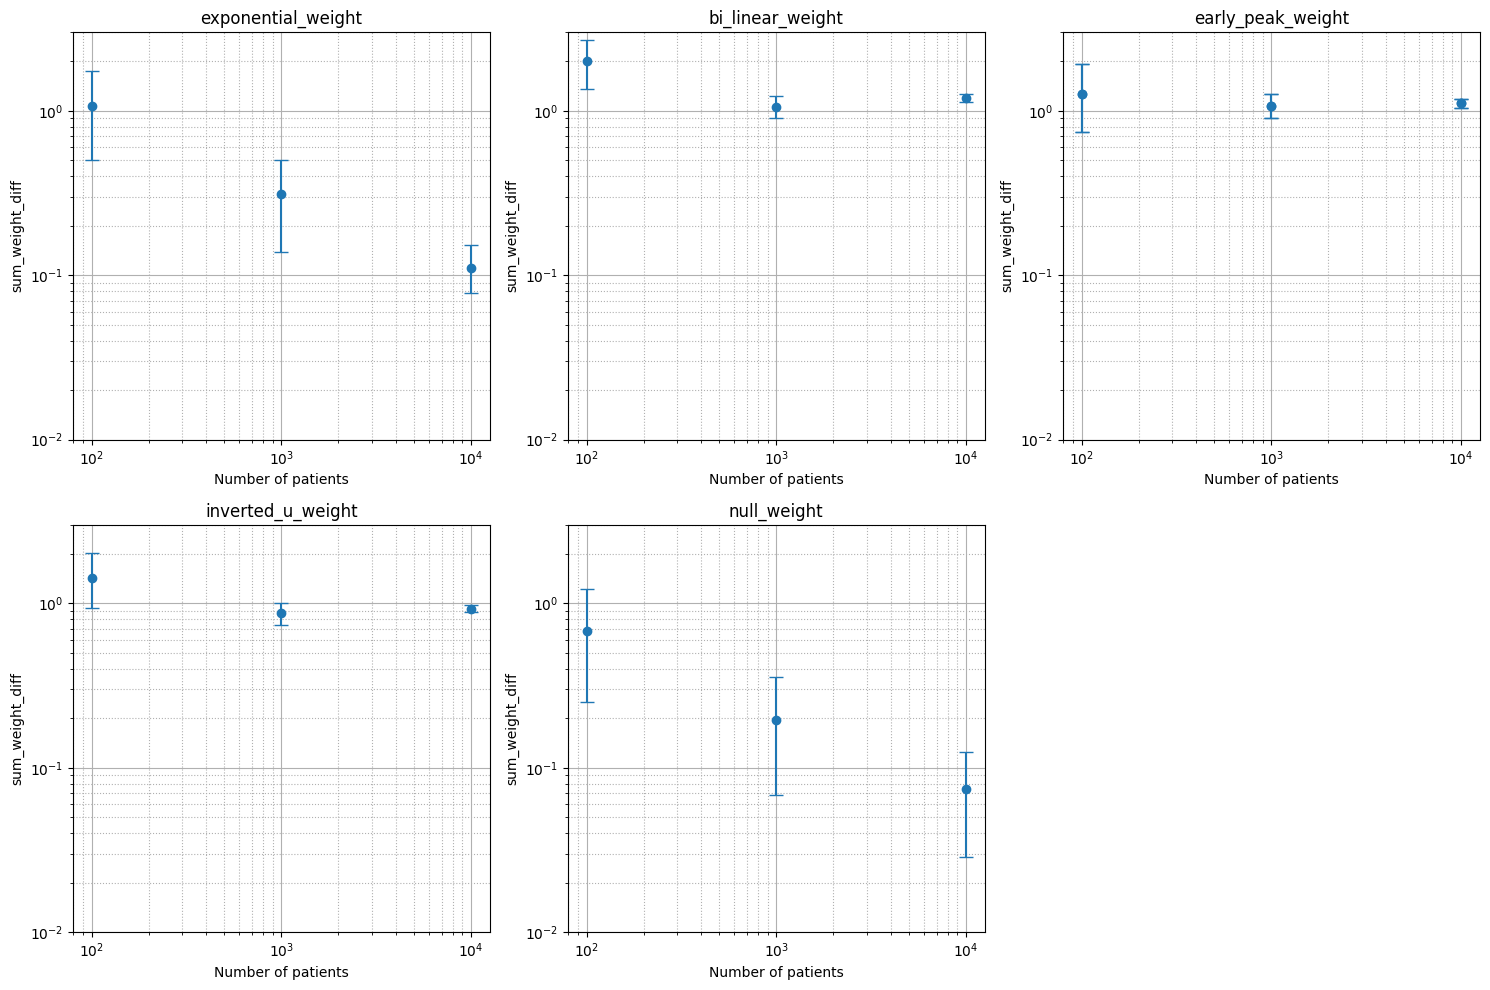

In [121]:
experiment_name = "multiple weights : 100 - 10000"

df = pd.read_csv("../Simulation_results/" + experiment_name + "/" + "analyzed_" + experiment_name +".csv")
df = df.fillna("None")



# print(df.keys())

# print(df)



# df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)

# print(df_selected)
# ax1 = plt.subplot(2, 2, 1) 
# plot_selection(ax1,df_selected,"sum_weight_diff")
# ax2 = plt.subplot(2, 2, 3) 
# plot_selection(ax2,df_selected,"AUC_diff")


min_patients = 100
max_patients = 100000
n_bootstraps = 1000
nknots = 1
constraint = "Right"




plt.figure(figsize=(15, 10))

analytics = "AUC_diff"

weight_function = "exponential_weight"

analytics = "sum_weight_diff"
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax= plt.subplot(2, 3, 1) 
# plt.ylim(0, 1.3)
plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("exponential_weight")
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")
plt.ylim((0.01,3))



weight_function = "bi_linear_weight"

df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)

ax = plt.subplot(2, 3, 2) 
# plt.ylim(0, 1.3)

plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("bi_linear_weight")
plt.tight_layout()
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")
plt.ylim((0.01,3))




weight_function = "early_peak_weight"

df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 3, 3) 
# plt.ylim(0, 1.3)

plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("early_peak_weight")
plt.tight_layout()
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")
plt.ylim((0.01,3))



weight_function = "inverted_u_weight"

df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 3, 4) 
# plt.ylim(0, 1.3)
plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("inverted_u_weight")
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")
plt.ylim((0.01,3))



weight_function = "null_weight"


df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


ax = plt.subplot(2, 3, 5) 
# plt.ylim(0, 1.3)

plot_selection(ax,df_selected,analytics)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(str(analytics))
plt.xlabel("Number of patients")
plt.title("null_weight")
plt.tight_layout()

plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")
plt.ylim((0.01,3))



# nknots = 3
# df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)


# ax = plt.subplot(2, 3, 6) 
# # plt.ylim(0, 1.3)

# plot_selection(ax,df_selected,analytics)
# plt.xscale('log')
# plt.yscale('log')
# plt.ylabel(str(analytics))
# plt.xlabel("Number of patients")
# plt.title("nknot = 3")
# plt.tight_layout()
# plt.grid(True, which="major", linestyle="-")
# plt.grid(True, which="minor", linestyle="dotted")



path = '/home/apoirotb/dev/Inria/Notes/Slides /Meeting 27-02-2024/images/'
file_name = "fucked_up_shit"
plt.savefig(path + file_name, transparent = True)

plt.show()
plt.show()

In [2]:
# simulation time
import numpy as np
import matplotlib.ticker as mticker



min_patients = 100
max_patients = 100000
n_bootstraps = 1000
nknots = 1
weight_function = "exponential_weight"
constraint = "Right"

# analytics = "AUC_diff"
analytics = "sum_weight_diff"

max_patients = 100000
df_selected = df_selector(df,min_patients,max_patients,nknots,weight_function,n_bootstraps,constraint)
df_selected = df_selected[df_selected["n_patients"].isin([100,1000,10000,100000])]


computation_time = list(df_selected["computation_time"])
print(computation_time)
computation_time_min = [x for x in computation_time]
n_patients = list(df_selected["n_patients"])

def custom_formatter(x, pos):
    return f"{int(x)}"

R_computation_time = [100,4000,120000]


n_patients_2 = [100,1000,10000]


# plt.rc('axes.formatter', useoffset=False)
plt.scatter(n_patients,computation_time_min)
plt.scatter(n_patients_2,R_computation_time)
plt.xscale('log')
plt.yscale('log')
# plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))
# plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))
plt.xlabel("Number of patients")
plt.ylabel("Computation time (sec)")
plt.title("Analysis of the computation time")
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")
# plt.figure(figsize=(12, 8))
plt.savefig('test.png')




NameError: name 'df_selector' is not defined

[8.8538, 0.7879, 2.8243, 22.2689]
[0.0951, 3.6065, 120.028, 10668.6639]
[0.4944, 0.7879, 2.8243, 22.2689]


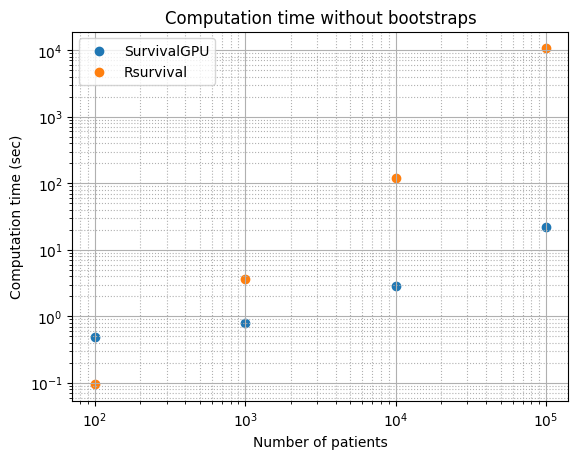

In [19]:
import json 

file_name = "100-1000 no bootstraps"

path = "../Simulation_results/Computation_time_comprison/" + file_name + ".json"

data_json = open(path)
data = json.load(data_json)
# print(data)


# simulation time
import numpy as np
import matplotlib.ticker as mticker





n_patients_list = [100,1000,10000,100000]
GPU_computaiton_time = []
CPU_computaiton_time = []
for n in n_patients_list:
    GPU_computaiton_time.append(data["GPU_computaiton_time"][str(n)][0])
    CPU_computaiton_time.append(data["CPU_computation_time"][str(n)][0])

print(GPU_computaiton_time)
print(CPU_computaiton_time)

GPU_computaiton_time[0] = 0.4944
print(GPU_computaiton_time)



# plt.rc('axes.formatter', useoffset=False)
plt.scatter(n_patients_list,GPU_computaiton_time)
plt.scatter(n_patients_list,CPU_computaiton_time)
plt.xscale('log')
plt.yscale('log')
# plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))
# plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))
plt.xlabel("Number of patients")
plt.ylabel("Computation time (sec)")
plt.title("Computation time without bootstraps")
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")
plt.legend(["SurvivalGPU","Rsurvival"])
# plt.figure(figsize=(12, 8))

path = '/home/apoirotb/dev/Inria/Notes/Slides /Meeting 27-02-2024/images/'
file_name = "computation_time_without_bootstraps"
plt.savefig(path + file_name, transparent = True)

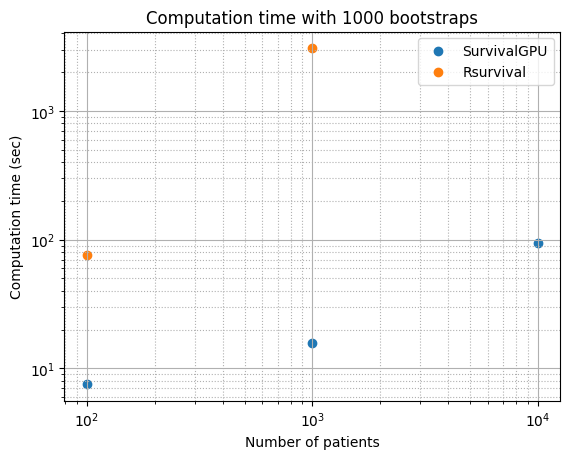

In [14]:
import json 

file_name = "100-1000 with bootstraps"

path = "../Simulation_results/Computation_time_comprison/" + file_name + ".json"

data_json = open(path)
data = json.load(data_json)
# print(data)


# simulation time
import numpy as np
import matplotlib.ticker as mticker





# n_patients_list = [100,1000,10000]
# GPU_computaiton_time = []
# CPU_computaiton_time = []
# for n in n_patients_list:
#     GPU_computaiton_time.append(data["GPU_computaiton_time"][str(n)][0])
#     CPU_computaiton_time.append(data["CPU_computation_time"][str(n)][0])

# print(GPU_computaiton_time)
# print(CPU_computaiton_time)

GPU_computaiton_time = [7.5245,15.7582,94.3655]
CPU_computaiton_time = [75.744,3068.077]


# plt.rc('axes.formatter', useoffset=False)
n_patients_list = [100,1000,10000]
plt.scatter(n_patients_list,GPU_computaiton_time)
n_patients_list = [100,1000]
plt.scatter(n_patients_list,CPU_computaiton_time)
plt.xscale('log')
plt.yscale('log')
# plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))
# plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))
plt.xlabel("Number of patients")
plt.ylabel("Computation time (sec)")
plt.title("Computation time with 1000 bootstraps")
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")
plt.legend(["SurvivalGPU","Rsurvival"])
# plt.figure(figsize=(12, 8))

path = '/home/apoirotb/dev/Inria/Notes/Slides /Meeting 27-02-2024/images/'
file_name = "computation_time_with_bootstraps"
plt.savefig(path + file_name, transparent = True)